## **ASSIGNMENT4 - TEXT DATA**

In [2]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [3]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# The number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

# Number of words to consider as features
maximum_features = 10000
# After this amount of words, cut the texts
#(among top max_features most common words)
max_len = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=maximum_features)

x_train = x_train[:100]
y_train = y_train[:100]

# This turns our lists of integers into a 2D integer tensor of shape
#`(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
from keras.models import Sequential
from keras.layers import Flatten, Dense


In [4]:
model = Sequential()

# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs

model.add(Embedding(10000, 8, input_length=max_len))

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))

#compiling the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - acc: 0.4875 - loss: 0.6951 - val_acc: 0.4500 - val_loss: 0.7010
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.8273 - loss: 0.6700 - val_acc: 0.4500 - val_loss: 0.7018
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.9273 - loss: 0.6486 - val_acc: 0.4500 - val_loss: 0.7020
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.9898 - loss: 0.6310 - val_acc: 0.4500 - val_loss: 0.7040
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.9812 - loss: 0.6126 - val_acc: 0.4500 - val_loss: 0.7036
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.9898 - loss: 0.5987 - val_acc: 0.4500 - val_loss: 0.7051
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.9898 - loss: 0.5799 - val_acc: 0.4500 - val_loss: 0.7061
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.9937 - loss: 0.5626 - val_acc: 0.4000 - val_loss: 0.7073
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.9820 - loss: 0.5476 - 

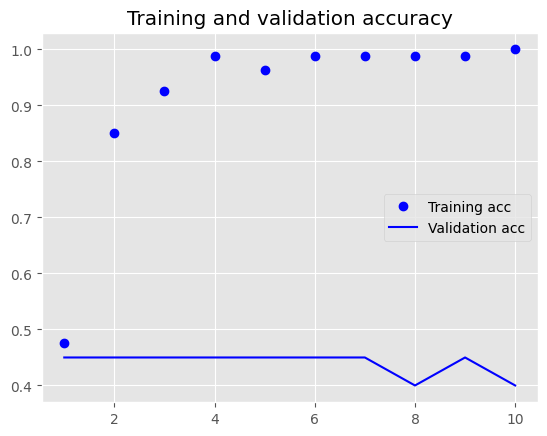

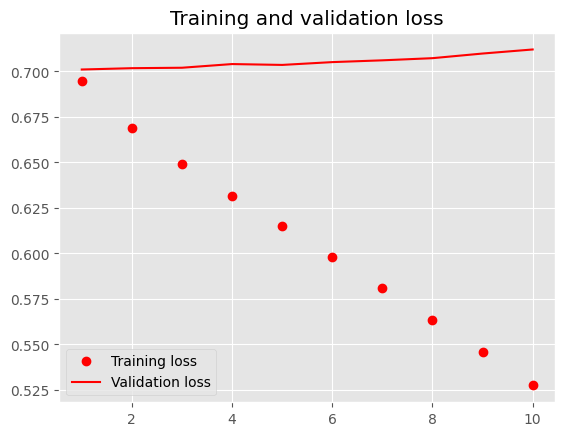

In [5]:
import matplotlib.pyplot as plt

# Training accuracy
acc = history.history["acc"]
# Validation accuracy
valid_accuracy = history.history["val_acc"]
# Training loss
loss = history.history["loss"]
# Validation loss
valid_loss = history.history["val_loss"]

#plots every epoch, here 10
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, valid_accuracy, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "ro", label = "Training loss")
plt.plot(epochs, valid_loss, "r", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()



In [6]:
test_loss, T_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.5172 - loss: 0.6938
Test loss: 0.694555401802063
Test accuracy: 0.5092399716377258


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.5087 - loss: 0.6930 - val_acc: 0.5300 - val_loss: 0.6907
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.8212 - loss: 0.6716 - val_acc: 0.5200 - val_loss: 0.6897
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.8965 - loss: 0.6564 - val_acc: 0.5300 - val_loss: 0.6888
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.9468 - loss: 0.6348 - val_acc: 0.5400 - val_loss: 0.6877
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.9641 - loss: 0.6146 - val_acc: 0.5600 - val_loss: 0.6865
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.9402 - loss: 0.5934 - val_acc: 0.5500 - val_loss: 0.6853
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.9662 - loss: 0.5607 - val_acc: 0.5400 - val_loss: 0.6844
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9706 - loss: 0.5248 - val_acc: 0.5600 - val_loss: 0.6838
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.9732

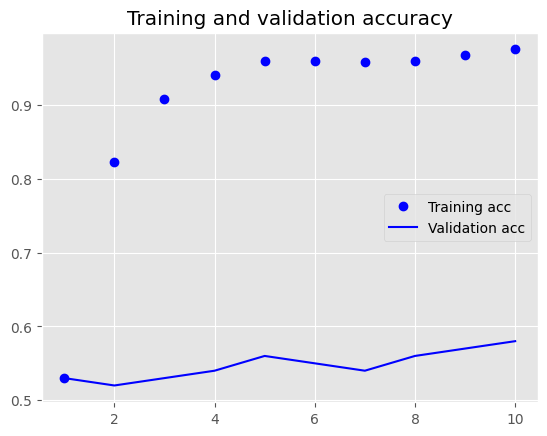

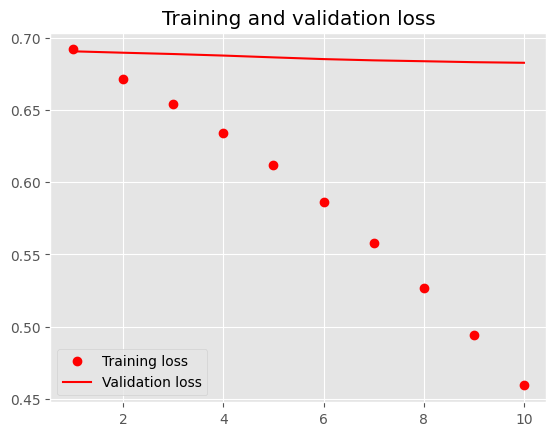

In [7]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
maximum_features = 10000
# After this amount of words, cut the texts
# (among top max_features most common words)
max_len = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=maximum_features)

x_train = x_train[:500]
y_train = y_train[:500]

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We provide our Embedding layer a maximum input length specification
# in order to flatten the embedded inputs later
model.add(Embedding(10000, 8, input_length=max_len))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.
# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
acc = history.history["acc"] # Training accuracy
valid_accuracy = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
valid_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, valid_accuracy, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "ro", label = "Training loss")
plt.plot(epochs, valid_loss, "r", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [8]:
test_loss, T_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.5468 - loss: 0.6893
Test loss: 0.6900271773338318
Test accuracy: 0.5413200259208679


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.5261 - loss: 0.6933 - val_acc: 0.5200 - val_loss: 0.6929
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.7861 - loss: 0.6766 - val_acc: 0.5150 - val_loss: 0.6916
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9081 - loss: 0.6597 - val_acc: 0.5200 - val_loss: 0.6900
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9521 - loss: 0.6359 - val_acc: 0.5400 - val_loss: 0.6879
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9623 - loss: 0.6103 - val_acc: 0.5750 - val_loss: 0.6853
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9614 - loss: 0.5789 - val_acc: 0.5900 - val_loss: 0.6824
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9733 - loss: 0.5423 - val_acc: 0.5850 - val_loss: 0.6794
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9820 - loss: 0.5001 - val_acc: 0.6150 - val_loss: 0.6762
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9829 - loss:

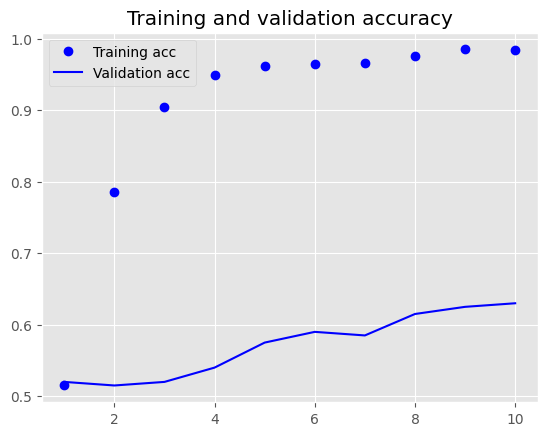

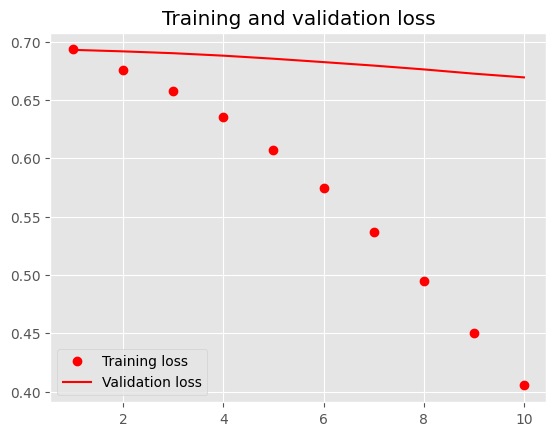

In [9]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
maximum_features = 10000
# After this amount of words, cut the texts
# (among top max_features most common words)
max_len = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=maximum_features)

x_train = x_train[:1000]
y_train = y_train[:1000]

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
# We provide our Embedding layer a maximum input length specification
# in order to flatten the embedded inputs later
model.add(Embedding(10000, 8, input_length=max_len))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
acc = history.history["acc"] # Training accuracy
valid_accuracy = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
valid_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, valid_accuracy, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "ro", label = "Training loss")
plt.plot(epochs, valid_loss, "r", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [10]:
test_loss, T_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.5495 - loss: 0.6851
Test loss: 0.6852630972862244
Test accuracy: 0.5479199886322021


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.5201 - loss: 0.6915 - val_acc: 0.6665 - val_loss: 0.6707
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.7650 - loss: 0.6203 - val_acc: 0.7990 - val_loss: 0.5050
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8497 - loss: 0.4361 - val_acc: 0.8410 - val_loss: 0.3891
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8888 - loss: 0.3209 - val_acc: 0.8505 - val_loss: 0.3467
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9099 - loss: 0.2574 - val_acc: 0.8580 - val_loss: 0.3298
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9311 - loss: 0.2111 - val_acc: 0.8600 - val_loss: 0.3176
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9457 - loss: 0.1675 - val_acc: 0.8620 - val_loss: 0.3223
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9634 - loss: 0.1317 - val_acc: 0.8595 - val_loss: 0.3230
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

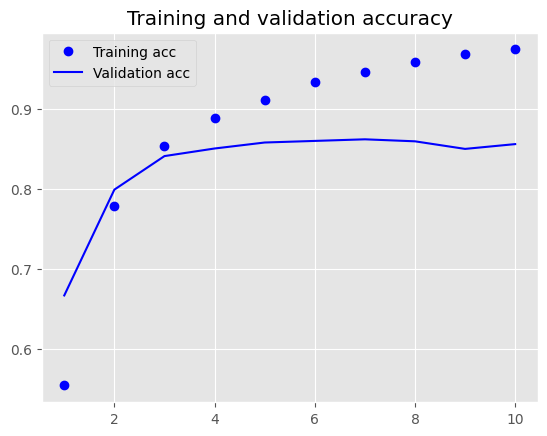

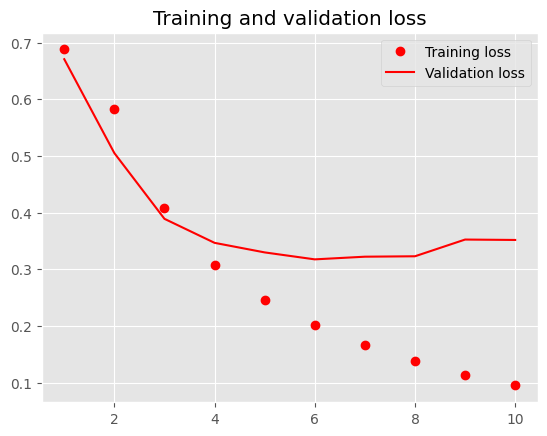

In [11]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
maximum_features = 10000
# After this amount of words, cut the texts
# (among top max_features most common words)
max_len = 150

# Data should be loaded as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=maximum_features)

x_train = x_train[:10000]
y_train = y_train[:10000]

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
# We provide our Embedding layer a maximum input length specification
# in order to flatten the embedded inputs later
model.add(Embedding(10000, 8, input_length=max_len))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
acc = history.history["acc"] # Training accuracy
valid_accuracy = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
valid_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, valid_accuracy, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "ro", label = "Training loss")
plt.plot(epochs, valid_loss, "r", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()



In [12]:
test_loss, T_accuracy_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8435 - loss: 0.3598
Test loss: 0.35710641741752625
Test accuracy: 0.5479199886322021


In [13]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  7083k      0  0:00:11  0:00:11 --:--:-- 7593k


In [14]:
import os
import shutil

imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

**If there is not enough training data to efficiently learn word embeddings with the problem you wish to solve, you can use pretrained word embeddings..**

**The labels of the training reviews (positive and negative) are gathered into a list of labels, and the individual training reviews are gathered into a list of strings, one string per review.**

**Data tokenization**

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np

maxlen = 150 # cuts off review after 150 words
training_samples = 100 # Trains on 100 samples
validation_samples = 10000 # Validates 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index    # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0]) # Splits data into training and validation set, but shuffles is, since samples are ordered:
# all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


**Downloading and preparing the word embedding for Glove**

In [16]:
import numpy as np
import requests
from io import BytesIO
import zipfile  # importing zipfile module

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


It then requires an embedding matrix that can be placed inside an embedding layer. The matrix needs to have dimensions (max words, embedding dim) and be 10000 x 100. Gloves measure 100 × 400000.

**Setting up the word embedding matrix for Glove**

In [17]:
embedding_dimension = 100

embedding_matrix = np.zeros((max_words, embedding_dimension))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [18]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dimension, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
# Add the Embedding layer with initial weights and set trainable to False
model.add(Embedding(max_words, embedding_dimension, input_length=maxlen, weights=[embedding_matrix], trainable=False))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

In [20]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

By adding pretrained word embedding to the Embeddig layer, we may set this to False and ensure that the Embedding layer cannot be trained when called. The optimization technique can alter the word embedding parameters if trainable = True is used. To prevent pretrained sections from forgetting what they already "know," it is better to wait to update them while they are still training.

In [21]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.weights.h5')

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 494ms/step - acc: 0.4759 - loss: 2.8627 - val_acc: 0.4917 - val_loss: 1.1162
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - acc: 0.7165 - loss: 0.6111 - val_acc: 0.5085 - val_loss: 1.2558
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 436ms/step - acc: 0.6670 - loss: 0.5798 - val_acc: 0.4926 - val_loss: 1.2903
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 435ms/step - acc: 0.8300 - loss: 0.4217 - val_acc: 0.5500 - val_loss: 0.7210
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 443ms/step - acc: 0.9838 - loss: 0.1560 - val_acc: 0.5085 - val_loss: 1.4701
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 410ms/step - acc: 0.7898 - loss: 0.3528 - val_acc: 0.5603 - val_loss: 0.7124
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 443ms/step - acc: 1.0000 - loss: 0.0719 - val_acc: 0.5094 - val_loss: 1.0199
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 452ms/step - acc: 1.0000 - loss: 0.0562 - val_acc: 0.5604 - val_loss: 0.7558
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 445ms/step - acc: 1.0000 - loss: 

As expected given the limited amount of training data, the model obviously overfits very rapidly. The notable variation in validation accuracy can be attributed to the same cause.

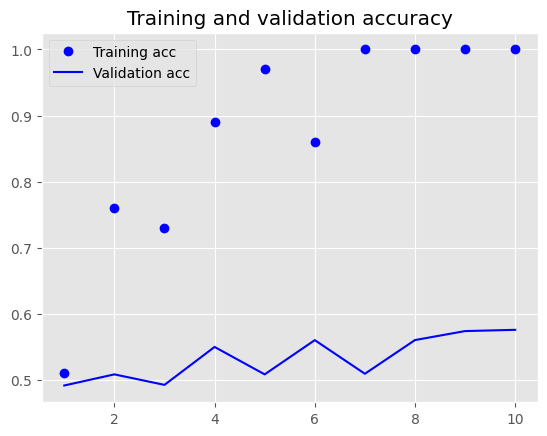

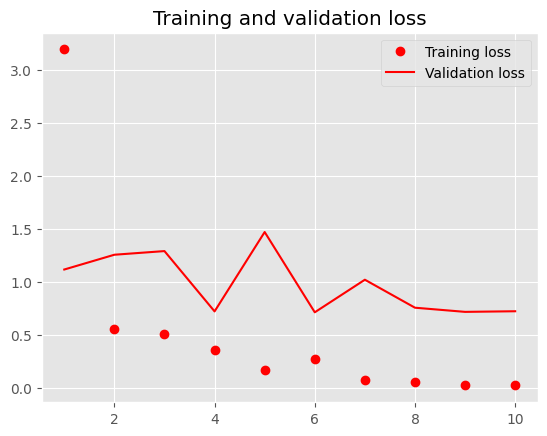

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
valid_accuracy = history.history['val_acc']
loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, valid_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, valid_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
test_loss, T_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5038 - loss: 0.7912
Test loss: 0.786836564540863
Test accuracy: 0.5091999769210815


In [24]:
!pip install tensorflow

!pip install tensorflow-text

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np

max_len = 150 # cuts off review after 150 words
training_samples = 500 # Trains on 500 samples
validation_samples = 10000 # Validates 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index    # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=max_len)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [25]:
indices = np.arange(data.shape[0]) # splits data into training and validation sets,
# however since the samples are arranged, it shuffles the data: all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [26]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
# The embeddings_initializer argument is used to initialize the embedding layer with the pretrained weights.
model.add(Embedding(max_words, embedding_dim, embeddings_initializer='uniform', input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# This line is no longer needed if you use embeddings_initializer when declaring the layer.
#model.layers[0].set_weights([embedding_matrix])
# The trainable attribute of the embedding layer is set to False to prevent the weights from being updated during training.
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.weights.h5')

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - acc: 0.5199 - loss: 0.6928 - val_acc: 0.4993 - val_loss: 0.6982
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - acc: 0.8565 - loss: 0.5820 - val_acc: 0.5017 - val_loss: 0.6984
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - acc: 0.9397 - loss: 0.4654 - val_acc: 0.5044 - val_loss: 0.7030
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - acc: 0.9808 - loss: 0.3514 - val_acc: 0.4974 - val_loss: 0.7335
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - acc: 0.9831 - loss: 0.2724 - val_acc: 0.5026 - val_loss: 0.7814
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - acc: 0.9739 - loss: 0.2138 - val_acc: 0.4999 - val_loss: 0.7324
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - acc: 0.9992 - loss: 0.1418 - val_acc: 0.4991 - val_loss: 0.7738
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - acc: 0.9964 - loss: 0.1042 - val_acc: 0.4975 - val_loss: 0.7720
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - acc: 1.

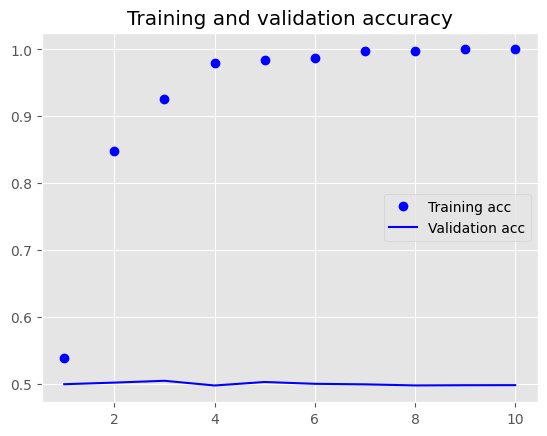

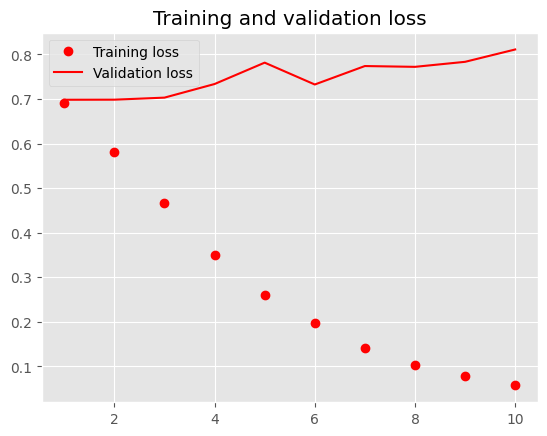

In [27]:


import matplotlib.pyplot as plt

acc = history.history['acc']
valid_accuracy = history.history['val_acc']
loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, valid_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, valid_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
test_loss, T_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.4990 - loss: 0.8145
Test loss: 0.8196229934692383
Test accuracy: 0.4959999918937683


In [29]:
!pip install keras
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np


maxlen = 150 # cuts off review after 150 words
training_samples = 1000 #Trains on 1000 samples
validation_samples = 10000 # Validates o 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index      # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [30]:
indices = np.arange(data.shape[0]) # splits data into training and validation sets,
# however since the samples are arranged, it shuffles the data: all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [31]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
# Add weights parameter and set trainable to False
model.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable=False))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.weights.h5') # Changed the filename to include .weights.h5



Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - acc: 0.4579 - loss: 1.5694 - val_acc: 0.5031 - val_loss: 0.6931
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - acc: 0.5516 - loss: 0.6870 - val_acc: 0.4977 - val_loss: 0.7362
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - acc: 0.6056 - loss: 0.6573 - val_acc: 0.5086 - val_loss: 0.7026
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - acc: 0.7000 - loss: 0.5703 - val_acc: 0.4964 - val_loss: 0.7710
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - acc: 0.7347 - loss: 0.5051 - val_acc: 0.4975 - val_loss: 1.0717
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - acc: 0.8389 - loss: 0.3988 - val_acc: 0.4956 - val_loss: 0.8867
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - acc: 0.9206 - loss: 0.3052 - val_acc: 0.4964 - val_loss: 1.0841
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - acc: 0.9435 - loss: 0.2030 - val_acc: 0.4966 - val_loss: 1.6496
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - acc: 0.93

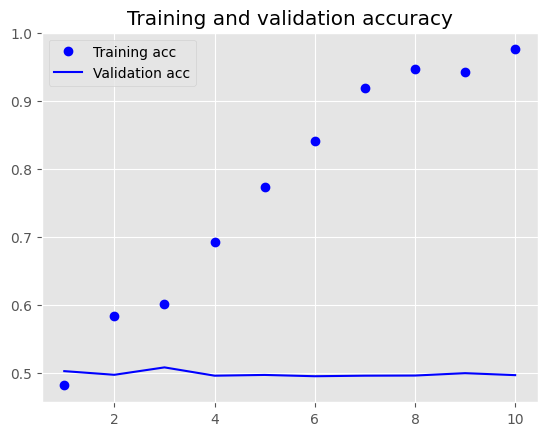

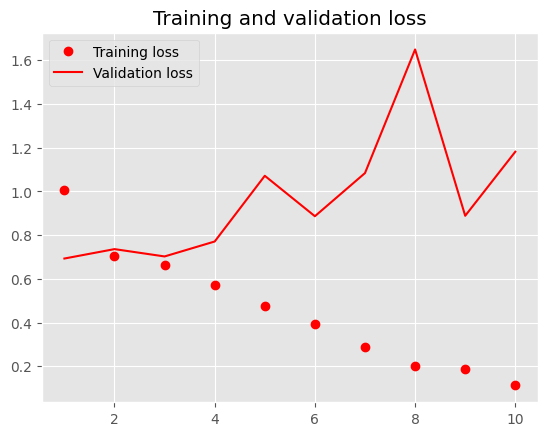

In [32]:
import matplotlib.pyplot as plt

acc = history.history['acc']
valid_accuracy = history.history['val_acc']
loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, valid_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, valid_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:
test_loss, T_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.5096 - loss: 1.1593
Test loss: 1.1671267747879028
Test accuracy: 0.504360020160675


In [34]:
!pip install tensorflow
!pip install keras

from tensorflow.keras.preprocessing.text import Tokenizer #Updated to get Tokenizer from tensorflow.keras
from keras.utils import pad_sequences
import numpy as np

max_len = 150 # cuts off review after 150 words
training_samples = 10000 # Trains on 10000 samples
validation_samples = 10000 # Validates o 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index       # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [35]:
indices = np.arange(data.shape[0]) # splits data into training and validation sets,
# however since the samples are arranged, it shuffles the data: all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [36]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
# Add weights parameter and set trainable to False during initialization
model.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable=False))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.weights.h5') # Changed the filename to include .weights.h5

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)             │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - acc: 0.5111 - loss: 1.1091 - val_acc: 0.4996 - val_loss: 0.9620
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - acc: 0.5888 - loss: 0.6984 - val_acc: 0.5000 - val_loss: 0.9053
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - acc: 0.6642 - loss: 0.6117 - val_acc: 0.5051 - val_loss: 0.7361
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - acc: 0.7252 - loss: 0.5465 - val_acc: 0.5038 - val_loss: 0.7901
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - acc: 0.7559 - loss: 0.4934 - val_acc: 0.5002 - val_loss: 1.1047
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - acc: 0.7839 - loss: 0.4435 - val_acc: 0.5003 - val_loss: 1.1089
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - acc: 0.8282 - loss: 0.3803 - val_acc: 0.4941 - val_loss: 0.9762
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - acc: 0.8482 - loss: 0.3382 - val_acc: 0.4941 - val_loss: 1.2906
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/

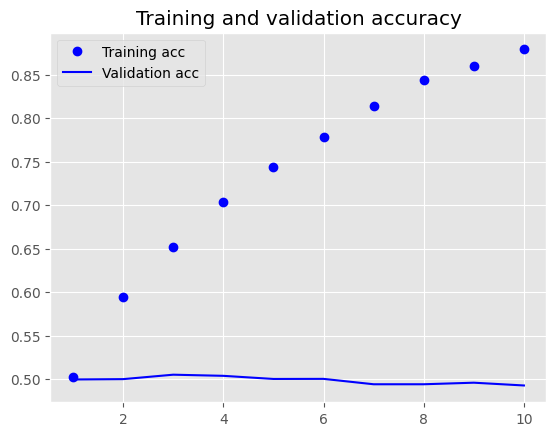

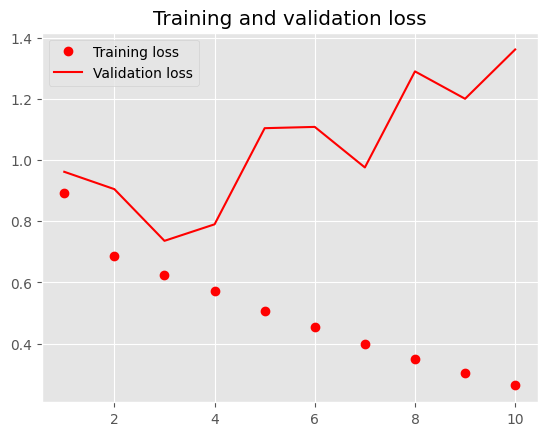

In [37]:
import matplotlib.pyplot as plt
acc = history.history['acc']
valid_accuracy = history.history['val_acc']
loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, valid_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, valid_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [38]:
test_loss, T_accuracy = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', T_accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.5059 - loss: 1.3551
Test loss: 1.3675094842910767
Test accuracy: 0.5013999938964844
